# Inverter Parameters Calculation

Based on:
- https://onlinelibrary.wiley.com/doi/abs/10.1002/cta.2628
- https://ieeexplore.ieee.org/document/9385387

## Architecture and specifications to be met


### Architecture:
![Capture d’écran 2024-03-18 à 11.00.11.png](<attachment:Capture d’écran 2024-03-18 à 11.00.11.png>)
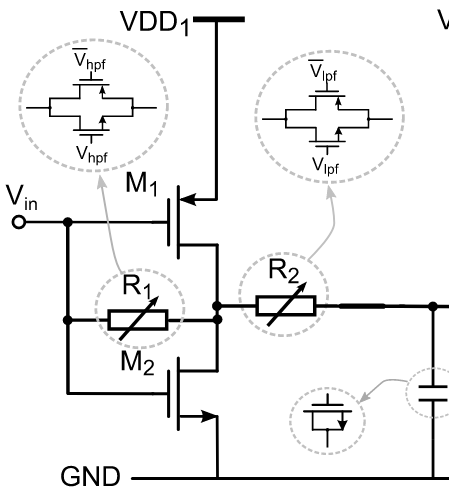

### Specifications:

- Power supply voltage: between 0.5V and 1.5V
- Input-referred noise: below 3uV between 300Hz and 10kHz
- Gain: above 20dB
- Frequency response: bandpass with flat gain between 10Hz and 5kHz
- Power consumption: below 10uW


### Technology specifications:

https://skywater-pdk.readthedocs.io/en/main/rules/device-details.html#details

## Transfer function

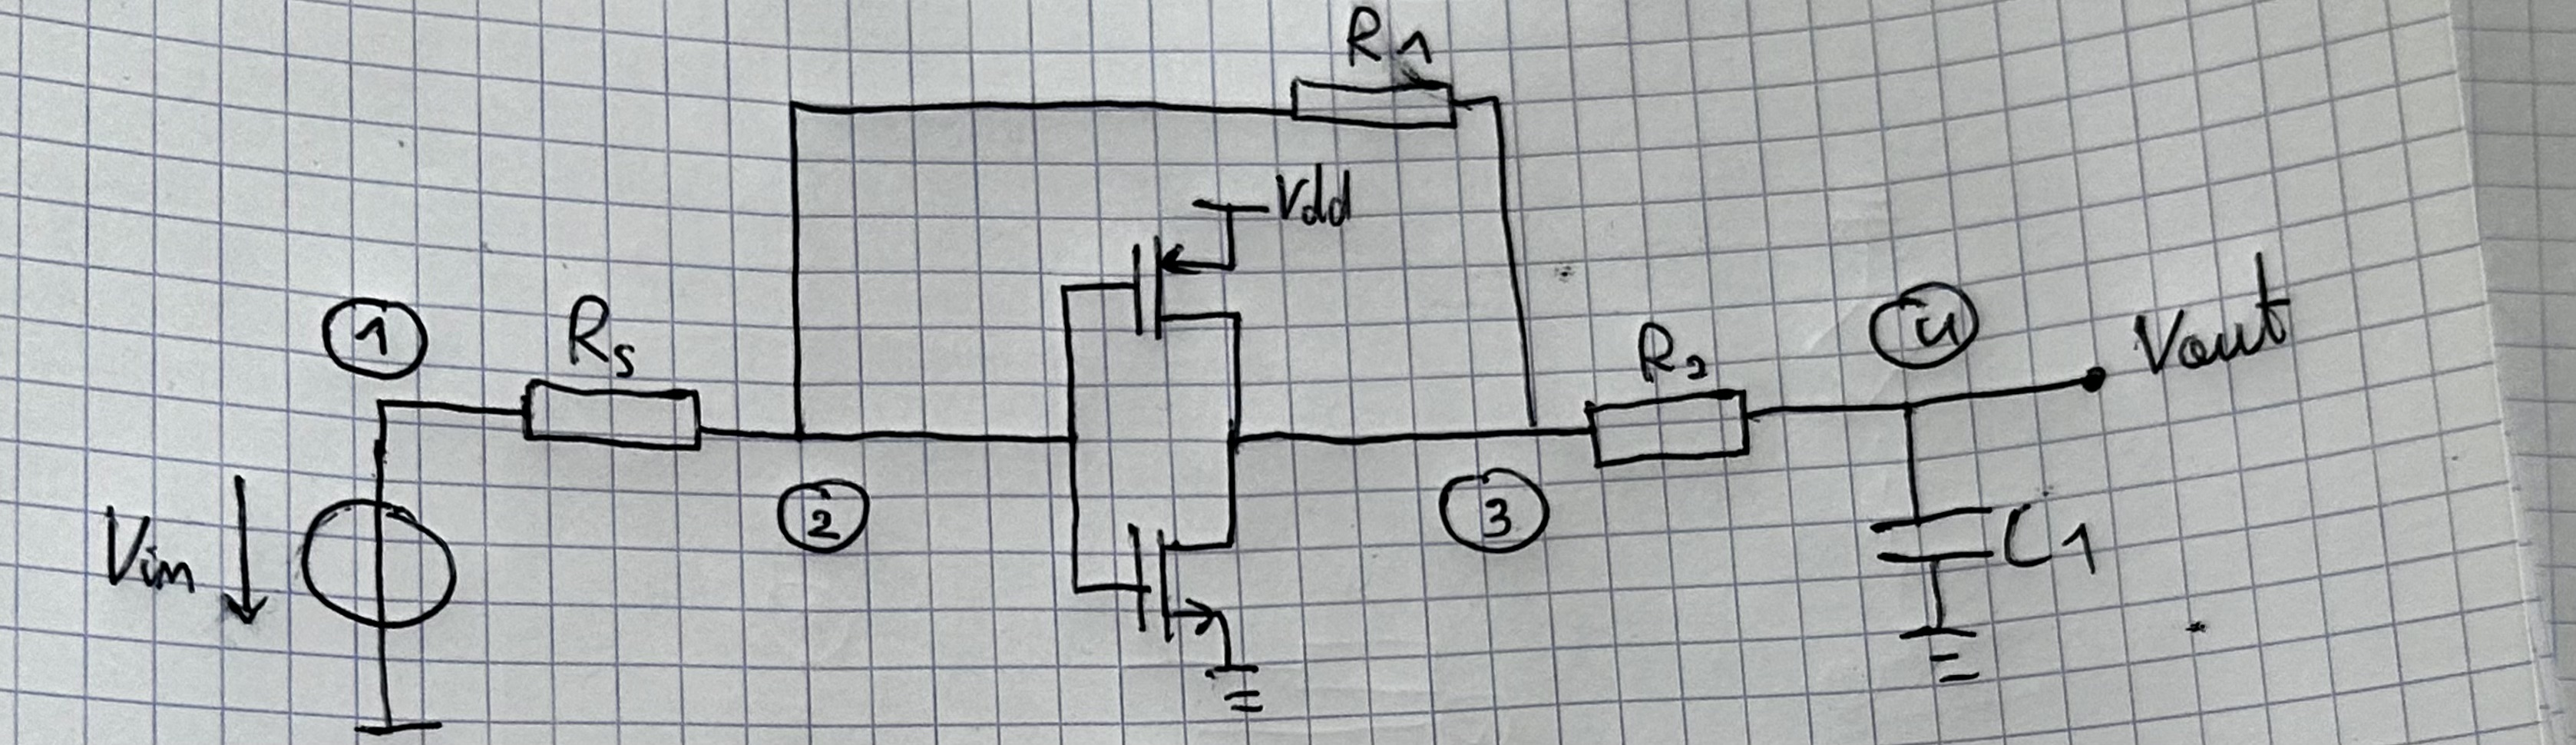

In [206]:
import sympy as sp

Delta = sp.symbols('Delta')
L1,L2 = sp.symbols('L1,L2')
T_num = sp.symbols('T_num')
T_den = sp.symbols('T_den')
T_io = sp.symbols('T_io')

R_s,G_dsp,C_1,G_mn,R_L,C_gsp,C_gsn,G_dsn,s,G_mp,R_2,R_1 = sp.symbols('R_s,G_dsp,C_1,G_mn,R_L,C_gsp,C_gsn,G_dsn,s,G_mp,R_2,R_1')


In [207]:
loops = [(L1, (-G_mn - G_mp)/(R_1*(G_dsn + G_dsp + 1/R_2 + 1/R_1)*(C_gsn*s + C_gsp*s + 1/R_s + 1/R_1))), (L2, 1/(R_2**2*(C_1*s + 1/R_L + 1/R_2)*(G_dsn + G_dsp + 1/R_2 + 1/R_1)))]
determinant = [(Delta, -L1 - L2 + 1)]
denominator = [(T_den, Delta)]

In [208]:
P1,D1 = sp.symbols('P1,D1')
paths = [(P1, (-G_mn - G_mp)/(R_2*R_s*(C_1*s + 1/R_L + 1/R_2)*(G_dsn + G_dsp + 1/R_2 + 1/R_1)*(C_gsn*s + C_gsp*s + 1/R_s + 1/R_1))), (D1, 1)]
numerator = [(T_num, D1*P1)]

In [209]:
transfer_function = [(T_io, T_num/T_den)]
T=T_io.subs(transfer_function).subs(numerator).subs(denominator).subs(determinant).subs(paths).subs(loops).simplify()

# In our case we consider Rs close to 0 and Rl close to infinit 
T = T.subs(R_s,0).simplify()
T = T.limit(R_L, sp.oo).simplify()

display(T)

-R_1*(G_mn + G_mp)/(C_1*G_dsn*R_1*R_2*s + C_1*G_dsp*R_1*R_2*s + C_1*R_1*s + C_1*R_2*s + G_dsn*R_1 + G_dsp*R_1 + 1)

In [210]:
#To have DC we want s=0
gain = T.subs(s, 0).simplify()
gain

-R_1*(G_mn + G_mp)/(G_dsn*R_1 + G_dsp*R_1 + 1)

In [211]:

gain = gain.subs([(R_1, 6e4),(G_mn, 1.642485e-03),(G_mp, 1.314671e-03),(G_dsn,  9.321295e-05),(G_dsp, 1.683471e-04)])
# Evaluate the numerical value of the gain
numerical_gain = gain.evalf()
numerical_gain

-10.6285838952801

In [212]:
import math

gain_db = 20 * math.log10(abs(numerical_gain))
gain_db

20.52950809868011

In [213]:
T_den = sp.denom(T).simplify()
T_den

C_1*G_dsn*R_1*R_2*s + C_1*G_dsp*R_1*R_2*s + C_1*R_1*s + C_1*R_2*s + G_dsn*R_1 + G_dsp*R_1 + 1

In [214]:
T_den = T_den.subs([(R_1, 6e4),(G_mn, 1.642485e-03),(G_mp, 1.314671e-03),(G_dsn,  9.321295e-05),(G_dsp, 1.683471e-04),
                    (C_gsn,9.11687e-15),(C_gsp,2.38216e-14), (R_s,0)])
T_den

16.693603*C_1*R_2*s + 60000.0*C_1*s + 16.693603

In [215]:
cutoff_frequency = 500e3

# Update the expression with the new value of s
T_den = T_den.subs(s, 2*sp.pi*cutoff_frequency)
T_den


16693603.0*pi*C_1*R_2 + 60000000000.0*pi*C_1 + 16.693603

In [216]:
#choosing a value for R2
R2 = 1e5
T_den = T_den.subs(R_2, R2)
C1 = sp.solve(T_den, C_1)
C1

#C1 = 2.768e-12
#T_den = T_den.subs(C_1, C1)
#R2 = sp.solve(T_den, R_2)
#R2

[-3.07266153324289e-12]